# Example 1: Infiltration of Water into a Single-Layered Soil Profile 

This notebook presents steps to replicate example 1 from: *David Rassam, Jirka Šimůnek, Dirk Mallants,and Martinus Th. van Genuchten, The HYDRUS-1D Software Package for Simulating the One-Dimensional Movement of Water, Heat, and Multiple Solutes in Variably-Saturated Media* \
Tutorial \
Version 1.00, July 2018

This example provides insctructions to create a Pydrus model that involves infiltration of water from a ponded soil surface into a 1-m deep single-layered loam soil. The soil profile is initially unsaturated, having an initial pressure head of -100 cm. The upper boundary and lower boundary are represented with: 

* Upper BC: Constant Pressure Head (pressure head at the soil surface is 1 cm)(corresponding to the ponding depth).
* Bottom BC: Free Drainage boundary condition (groundwater table is at an unspecified point deep in the profile (e.g., more than 10 m). 

### 1. Import the Pydrus package

In [1]:
import os
import pydrus as ps
%matplotlib inline

### 2. Create the basic model & add time information

In [2]:
# Folder for Hydrus files to be stored
ws = "example_1"
exe = os.path.join(os.getcwd(),"../../source/hydrus.exe")  
# Description
desc = "Infiltration of Water into a Single-Layered Soil Profile"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc, mass_units="mmol",
              time_unit="days", length_unit="cm")
ml.basic_info["lFlux"] = True
ml.basic_info["lShort"] = False

ml.add_time_info(tmax=1, print_times=True, nsteps=12, dt=0.001)

Directory example_1 created


array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        ])

### 3. Add processes and materials

In [3]:
ml.add_waterflow(top_bc=0, bot_bc=4)

m = ml.get_empty_material_df(n=1)
m.loc[[1, 1]] = [[0.078, 0.43, 0.036, 1.56, 24.96, 0.5]]
ml.add_material(m)

water                               
     thr   ths   Alfa     n     Ks    l
1  0.078  0.43  0.036  1.56  24.96  0.5

### 4. Add profile information

In [4]:
elements = 100  # Disctretize soil column into n elements
depth = -100  # Depth of the soil column
ihead = -100  # Determine initial Pressure Head
# Create Profile
profile = ps.create_profile(bot=depth, dx=abs(depth / elements), h=ihead)
profile.iloc[0, 1] = 1  # Define initial Pressure Head at the surface
ml.add_profile(profile)  # Add the profile

### 5 Add observation nodes

In [5]:
# Add observation nodes at depth
ml.add_obs_nodes([-20, -40, -60, -80, -100])

### 6. Write hydrus input files & run hydrus

In [6]:
ml.write_input()
ml.simulate()

CompletedProcess(args=['C:\\Matevz_arbeit\\pydrus\\examples\\hydrus_orig\\../../source/hydrus.exe', 'example_1', '-1'], returncode=0)

### 7 Plot results

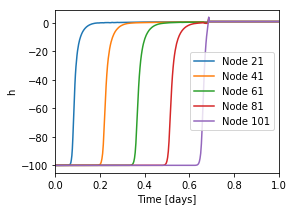

In [7]:
ml.plots.obs_points()

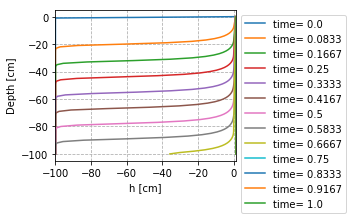

In [8]:
ml.plots.profile_information()

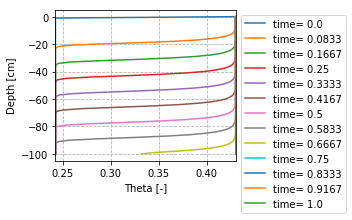

In [9]:
ml.plots.profile_information("Water Content")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000268EB1EA8D0>,
      dtype=object)

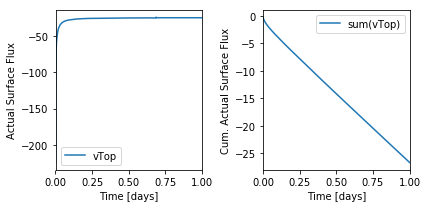

In [10]:
ml.plots.water_flow(data="Actual Surface Flux")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000268EB281470>,
      dtype=object)

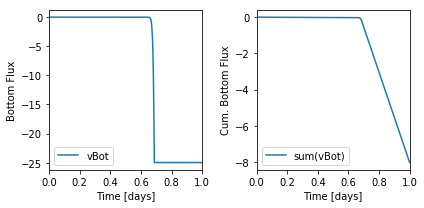

In [11]:
ml.plots.water_flow(data="Bottom Flux")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000268EB31B978>,
      dtype=object)

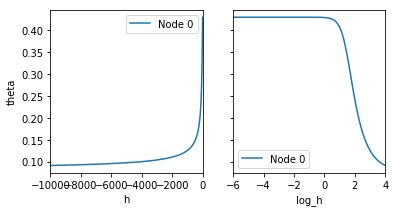

In [12]:
ml.plots.soil_properties()